# EBA3500 Lecture 7. Interaction and ANOVA

We'll use the `titanic` data set once again. 

In [3]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Interactions

Interactions are regression terms that involve products of two or more covariates, e.g., 
$$y = \alpha + \beta_1 x_1 + \beta_{12} x_1x_2.$$ 
The terminology is most freqently used for categorical variables. Let's explore what it means.

## The Cartesian product

We'll have to deal with another fundamental set-theoretic construction, called the *Cartesian product*. 

**Note:** If something is *Cartesian*, it is named after the French reneissance philosopher René Descartes.

We will use the symbol "$\in$", which reads "in". Writing "$a\in A$" means the same as "$a \textrm{ in } A$". This symbol may look unfamiliar but is a staple of mathematical notation.

#### Definition
> Let $A$ and $B$ be two sets. The *Cartesian product*, denoted by $A\times B$, is the unique set containing the tuples $(a,b)$ for $a\in A$ and $b \in B$. 

We also call $A \times B$ the *product set*, or the product of $A$ and $B$. 

#### Example

Recall the sex and class categories from the Titanic data set.

In [5]:
set(titanic.sex)

{'female', 'male'}

In [7]:
set(titanic["class"])

{'First', 'Second', 'Third'}

We will construct the product set of these two sets. To to this, we will use the `product` function from `itertools`. This function often comes in handy in programming in general.

In [9]:
from itertools import product
sex_class = set(product(set(titanic.sex), set(titanic["class"])))
sex_class

{('female', 'First'),
 ('female', 'Second'),
 ('female', 'Third'),
 ('male', 'First'),
 ('male', 'Second'),
 ('male', 'Third')}

It is not the case that $A\times B = B\times A$!

In [10]:
from itertools import product
class_sex = set(product(set(titanic["class"]), set(titanic["sex"])))
class_sex

{('First', 'female'),
 ('First', 'male'),
 ('Second', 'female'),
 ('Second', 'male'),
 ('Third', 'female'),
 ('Third', 'male')}

In [12]:
class_sex == sex_class

False

We can also take the product of more than two sets, say $A\times B \times C$. Such products are defined in the obvious way, i.e., $(a,b,c)\in A\times B\times C$ if and only if $a\in A$, $b \in B$, and $c \in C$.

In [14]:
set(titanic.survived)

{0, 1}

In [15]:
set(product(set(titanic["class"]), set(titanic["sex"]), set(titanic["survived"])))

{('First', 'female', 0),
 ('First', 'female', 1),
 ('First', 'male', 0),
 ('First', 'male', 1),
 ('Second', 'female', 0),
 ('Second', 'female', 1),
 ('Second', 'male', 0),
 ('Second', 'male', 1),
 ('Third', 'female', 0),
 ('Third', 'female', 1),
 ('Third', 'male', 0),
 ('Third', 'male', 1)}

#### Exercise
Suppose that $A, B, C$ have elements $n,m,k$ each. What is the size of $A\times B\times C$?

### Titanic and interaction

Recall from the last lecture that both sex and class affects the probability of survival. 

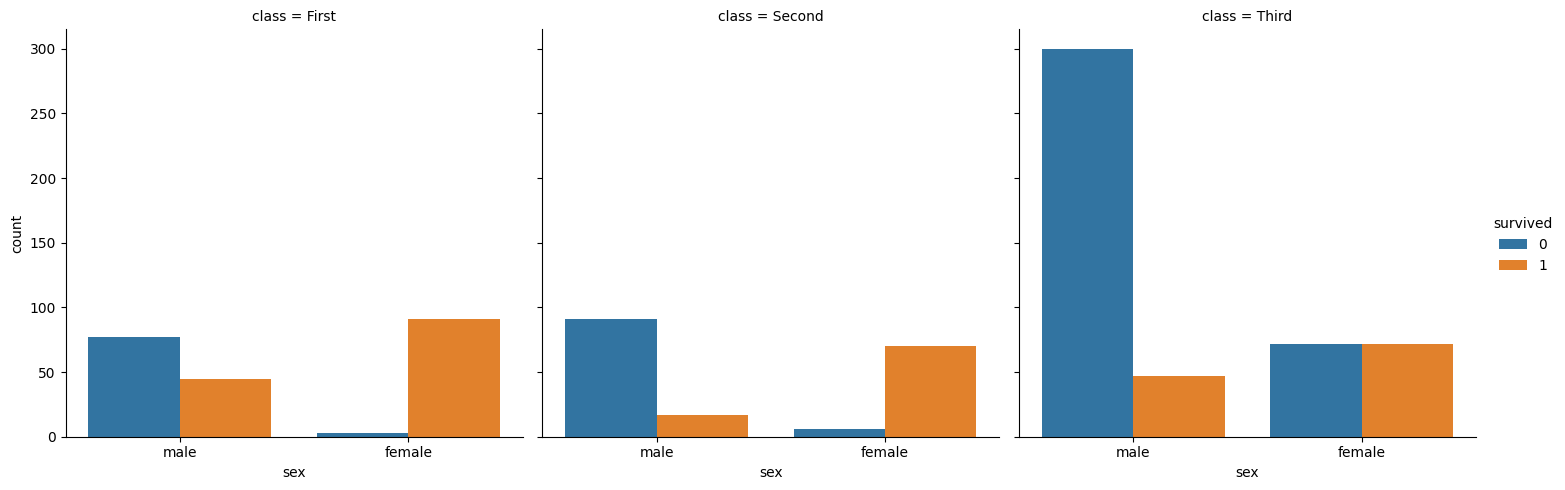

In [16]:
import seaborn as sns
sns.catplot(x="sex", hue="survived", col="class", data=titanic, kind="count")

The basic model involves only *linear effects*
$$
y = \beta_0 + \beta_{\textrm{male}}1[\textrm{sex} = \textrm{male}] + \beta_{\textrm{2nd}}1[\textrm{class} = \textrm{2nd}]+ \beta_{\textrm{3rd}}1[\textrm{class} = \textrm{3rd}] + \beta_{\textrm{Crew}}1[\textrm{class} = \textrm{crew}].
$$



Let's fit it and see what we get.

In [20]:
import statsmodels.formula.api as smf
fit = smf.ols("survived ~ sex + Q('class')", data = titanic).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     172.0
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           7.04e-88
Time:                        06:01:53   Log-Likelihood:                -417.70
No. Observations:                 891   AIC:                             843.4
Df Residuals:                     887   BIC:                             862.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9212      0.031     30.118      0.000       0.861       0.981
sex[T.male]             -0.5163      0.027    -18.814      0.000      -0.570      -0.462
Q('class')[T.Second]    -0.1454      0.039     -3.739      0.000      -0.222      -0.069
Q('class')[T.Third]     -0.3140      0.032     -9.849      0.000      -0.377      -0.251
==============================================================================
Omnibus:                       41.418   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.281
Skew:                           0.557   Prob(JB):                     8.92e-11
Kurtosis:                       3.081   Cond. No.                         5.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we check how well the estimates match the data. First we'll take a look at the predicted values of the model.

In [42]:
import pandas as pd
records = sorted(list(product(set(titanic.sex), set(titanic["class"]))))
records

[('female', 'First'),
 ('female', 'Second'),
 ('female', 'Third'),
 ('male', 'First'),
 ('male', 'Second'),
 ('male', 'Third')]

We need to make this into a data frame, as follows.

In [43]:
frame = pd.DataFrame.from_records(records, columns = ["sex", "class"])
frame

,sex,class
0,female,First
1,female,Second
2,female,Third
3,male,First
4,male,Second
5,male,Third


We want to predict the probability of survival at the values in `frame`.
So to do this, we will use the `predict` method.

In [44]:
fit.predict(frame)

0    0.921226
1    0.775854
2    0.607221
3    0.404957
4    0.259584
5    0.090951
dtype: float64

This is just a list of floats with no names. Let's merge it with the `frame` to make stuff clearer

In [45]:
frame["predicted"] = fit.predict(frame)
frame

,sex,class,predicted
0,female,First,0.921226
1,female,Second,0.775854
2,female,Third,0.607221
3,male,First,0.404957
4,male,Second,0.259584
5,male,Third,0.090951


Let's compare these predictions to the means using the `groupby` method.

In [46]:
means = titanic.groupby(["sex", "class"]).mean()["survived"]
means

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

This table is simple enough. The mean on the column to the right is the mean of the subgroup for the corresponding sex and class on the right.

Let's compare these means to the predicted values of our model.

In [47]:
import numpy as np
frame["mean"] = means.array
frame

,sex,class,predicted,mean
0,female,First,0.921226,0.968085
1,female,Second,0.775854,0.921053
2,female,Third,0.607221,0.500000
3,male,First,0.404957,0.368852
4,male,Second,0.259584,0.157407
5,male,Third,0.090951,0.135447


Why aren't the values equal? First, notice that there are $6$ means, but only $4$ parameters in the regression output. 

In [49]:
fit.params

Intercept               0.921226
sex[T.male]            -0.516270
Q('class')[T.Second]   -0.145372
Q('class')[T.Third]    -0.314005
dtype: float64




Second, the model doens't take *interactions* into account, only linear effects. Interactions occur when the effect of one variable depends on the value of another variable.


### A "two-way" model

Let $A$ and $B$ be sets with $I$ and $J$ elements each. Consider the following model
$$y=\sum_{i=1}^{I}\sum_{j=1}^{J}\beta_{ij}1[X_{1}=a_{j}]1[X_{2}=b_{k}].$$
That is the same model as, using $X = (X_1, X_2)$,
$$y=\sum_{i=1}^{I}\sum_{j=1}^{J}\beta_{ij}1[X = (a_{j}, b_{k})],$$
where $(a_i,b_j) \in A\times B$. Thus it may be viewed as an ordinary categorical variable model.

### Titanic example

Let $A = \{\textrm{female}, \textrm{male}\}$ and $B = \{\textrm{1st},\textrm{2nd}, \textrm{3rd}, \textrm{Crew}\}$. That is, $A$ are the sex categories and $B$ are the class categories. Remember their product set, which equals


In [16]:
set(product(set(titanic.Sex), set(titanic.Class)))

{('Female', '1st'),
 ('Female', '2nd'),
 ('Female', '3rd'),
 ('Female', 'Crew'),
 ('Male', '1st'),
 ('Male', '2nd'),
 ('Male', '3rd'),
 ('Male', 'Crew')}

Writing down the model explicitly doesn't help, as it's cumbersome to look at. But using $$y=\sum_{i=1}^{I}\sum_{j=1}^{J}\beta_{ij}1[X = (a_{j}, b_{k})],$$
where $(a_i,b_j) \in A\times B$, we can write a table of the corresponding coefficients.

|         |        | Class |     |     |      |
| ---     |------- | ----- | --- |-----| ---  |
|         |        | 1st   | 2nd | 3rd | Crew |
| **Sex** |        |       |     |     |      |
|         | Female | $\beta_{11}$ | $\beta_{12}$ | $\beta_{13}$ | $\beta_{14}$     |
|         | Male   | $\beta_{21}$ | $\beta_{22}$ | $\beta_{23}$ | $\beta_{24}$     |

When you want to predict the probability of survival for a male passenger traveling 3rd class, you find the second row (male) and third column (3rd class), and use the $\beta_{23}$ coefficient. 

Now let's fit the model! To do this, we will define a new column in the data frame `titanic` containing the product set of `Sex` and `Class`.

In [50]:
titanic["sex_class"] = list(zip(titanic["sex"], titanic["class"]))
titanic["sex_class"]

0        (male, Third)
1      (female, First)
2      (female, Third)
3      (female, First)
4        (male, Third)
            ...       
886     (male, Second)
887    (female, First)
888    (female, Third)
889      (male, First)
890      (male, Third)
Name: sex_class, Length: 891, dtype: object

Now we're ready to run the model.

In [52]:
fit2 = smf.ols("survived ~ sex_class - 1", data = titanic).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.32e-93
Time:                        06:08:07   Log-Likelihood:                -399.13
No. Observations:                 891   AIC:                             810.3
Df Residuals:                     885   BIC:                             839.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
sex_class[('female', 'First')]      0.9681      0.039     24.700      0.000       0.891       1.045
sex_class[('female', 'Second')]     0.9211      0.044     21.131      0.000       0.836       1.007
sex_class[('female', 'Third')]      0.5000      0.032     15.790      0.000       0.438       0.562
sex_class[('male', 'First')]        0.3689      0.034     10.721      0.000       0.301       0.436
sex_class[('male', 'Second')]       0.1574      0.037      4.305      0.000       0.086       0.229
sex_class[('male', 'Third')]        0.1354      0.020      6.640      0.000       0.095       0.175
==============================================================================
Omnibus:                       80.766   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.275
Skew:                           0.817   Prob(JB):                     1.02e-22
Kurtosis:                       3.247   Cond. No.                         2.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's see how these new coefficients match the means we just calculated.

In [53]:
frame["new_predicted"] = fit2.params.array
frame

,sex,class,predicted,mean,new_predicted
0,female,First,0.921226,0.968085,0.968085
1,female,Second,0.775854,0.921053,0.921053
2,female,Third,0.607221,0.500000,0.500000
3,male,First,0.404957,0.368852,0.368852
4,male,Second,0.259584,0.157407,0.157407
5,male,Third,0.090951,0.135447,0.135447


That's perfect!

As it happens, `statsmodels` allows us to run interaction models such as these easily. We just need to use the `*` command:

In [57]:
import statsmodels.formula.api as smf
fit = smf.ols("survived ~ sex * Q('class')", data = titanic).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.32e-93
Time:                        06:09:33   Log-Likelihood:                -399.13
No. Observations:                 891   AIC:                             810.3
Df Residuals:                     885   BIC:                             839.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.9681      0.039     24.700      0.000       0.891       1.045
sex[T.male]                         -0.5992      0.052    -11.490      0.000      -0.702      -0.497
Q('class')[T.Second]                -0.0470      0.059     -0.802      0.423      -0.162       0.068
Q('class')[T.Third]                 -0.4681      0.050     -9.290      0.000      -0.567      -0.369
sex[T.male]:Q('class')[T.Second]    -0.1644      0.077     -2.130      0.033      -0.316      -0.013
sex[T.male]:Q('class')[T.Third]      0.2347      0.064      3.648      0.000       0.108       0.361
==============================================================================
Omnibus:                       80.766   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.275
Skew:                           0.817   Prob(JB):                     1.02e-22
Kurtosis:                       3.247   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yet again, we have to think about baselines. Since there is no `sex[T.Female]` in the table, the baseline sex is female. Since there is no `class[T.1st]` in the table, the baseline class is 1st class.

To calculate the predicted value of, say, a male with class `3rd`, you would have to sum the coefficients of `sex[T.Male]`, `class[T.3rd]` *and* `sex[T.Male]:class[T.3rd]`. 

In [61]:
fit.params

Intercept                           0.968085
sex[T.male]                        -0.599233
Q('class')[T.Second]               -0.047032
Q('class')[T.Third]                -0.468085
sex[T.male]:Q('class')[T.Second]   -0.164413
sex[T.male]:Q('class')[T.Third]     0.234679
dtype: float64

In [64]:
coef = fit.params
coef["Intercept"] + coef["sex[T.male]"] + coef["Q('class')[T.Third]"]+ coef["sex[T.male]:Q('class')[T.Third]"]

0.135446685878962

In [72]:
frame["mean"][5]

0.13544668587896252

It's clearly harder to interpret the coefficients of a the `statsmodels` object with formula `"survived ~ sex * class"` than that with formula `"survived ~ sex_class - 1"`. However, we may use the formulation `"survived ~ sex * class"` to more easily ask meaningful questions.




Most importantly, do we need the interaction terms or not? In other words, do we need the whole model `"Survived_01 ~ Sex * Class"`, or would it suffice with `"Survived_01 ~ Sex + Class"`?

## Testing for interactions

Testing for interactions is similar to the testing we did in the last lecture. Consider a model with $2$ categorical variables $x_1$ and $x_2$ with $I$ and $J$ categories each. The model with linear effects is 
$$
y = \beta_0 + \sum_{i = 2}^{I} {\beta^1_{i}1[x_1 = i]} + \sum_{j = 2}^{J} {\beta^2_{j} 1[x_2 = j]} + \epsilon
$$

Here we start the sums at $i=2$ and $j=2$ since the $x_1 = 1$ and $x_2 = 2$ are absorbed into the baseline.

This is the general form of the titanic model with two categories we've already looked at:

In [64]:
fit = smf.ols("survived ~ sex + class", data = titanic).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Survived_01   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          4.09e-133
Time:                        11:31:14   Log-Likelihood:                -1139.0
No. Observations:                2201   AIC:                             2288.
Df Residuals:                    2196   BIC:                             2317.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9001      0.026     34.739      0.000       0.849       0.951
Sex[T.Male]      -0.4974      0.023    -21.575      0.000      -0.543      -0.452
Class[T.2nd]     -0.1737      0.033     -5.258      0.000      -0.238      -0.109
Class[T.3rd]     -0.2887      0.028    -10.489      0.000      -0.343      -0.235
Class[T.Crew]    -0.1761      0.028     -6.270      0.000      -0.231      -0.121
==============================================================================
Omnibus:                      222.654   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.437
Skew:                           0.891   Prob(JB):                     1.91e-64
Kurtosis:                       2.836   Cond. No.                         7.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model doesn't include interactions, as there are no product terms $1[x_1 = i]1[x_2 = j]$ in the model. Let's add them to the model and see what it looks like.

The interaction model $$y=\sum_{i=1}^{I}\sum_{j=1}^{J}\beta_{ij}1[X_{1}=a_{j}]1[X_{2}=b_{k}]$$ can be written as en extension of the linear effects model $$y = \beta_0 + \sum_{i = 2}^{I} {\beta^1_{i}1[x_1 = i]} + \sum_{j = 2}^{J} {\beta^2_{j} 1[x_2 = j]} + \sum_{i = 2}^{I}\sum_{j = 2}^{J} {\beta^{1\times2}_{ij} 1[x_1 = j]1[x_2=j]} + \epsilon$$

The double sum starts at $i,j=2$ due to absorption into the baseline.

Formulating the interaction model in this way allows us to formulate a test of whether the interactions matter. Our null hypothesis is that the all the regression coefficients belonging to the interaction part of the model are $0$. Formally, we could write
$$H_0: \beta^{1\times2}_{ij} = 0\quad \textrm{for all } i,j\geq2.$$
Our alternative hypothesis is that the interaction terms matter *in some way*. In other words, at least one coefficients $\beta^{1\times2}_{ij}$ is not equal to $0$.
$$H_a: \textrm{There is a pair } (i,j) \textrm{ where } \beta^{1\times2}_{ij} \neq 0.$$

Notice that we only care about the interaction coefficients $\beta_{ij}^{1\times2}$; the other regression coefficients aren't featured in the hypothesis statements at all.

This is similar to the setup in the previous lecture in the $F$ test, except that we care about a *subset* of $\beta$

### Example

We'll continue work with the interaction model for `titanic`.

First, recall the linear effects model:
$$
y = \beta_0 + \beta_{\textrm{male}}1[\textrm{sex} = \textrm{male}] + \beta_{\textrm{2nd}}1[\textrm{class} = \textrm{2nd}]+ \beta_{\textrm{3rd}}1[\textrm{class} = \textrm{3rd}] + \beta_{\textrm{Crew}}1[\textrm{class} = \textrm{crew}].
$$

In the `statsmodels` regression model below, we add the interaction terms corresponding to $\beta_{\textrm{male}\times\textrm{2nd}}$, $\beta_{\textrm{male}\times\textrm{3rd}}$, $\beta_{\textrm{male}\times\textrm{crew}}$, making the interaction model

$$
y = \beta_0 + \beta_{\textrm{male}}1[\textrm{sex} = \textrm{male}] + \beta_{\textrm{2nd}}1[\textrm{class} = \textrm{2nd}]+ \beta_{\textrm{3rd}}1[\textrm{class} = \textrm{3rd}] + \beta_{\textrm{Crew}}1[\textrm{class} = \textrm{crew}] + 
\beta_{\textrm{male}\times\textrm{2nd}}1[(\textrm{sex}, \textrm{class}) = (\textrm{male}, \textrm{2nd})] + 
\beta_{\textrm{male}\times\textrm{3rd}}1[(\textrm{sex}, \textrm{class}) = (\textrm{male}, \textrm{3nd})] + 
\beta_{\textrm{male}\times\textrm{crew}}1[(\textrm{sex}, \textrm{class}) = (\textrm{male}, \textrm{crew})].
$$

In [74]:
import statsmodels.formula.api as smf
fit = smf.ols("survived ~ sex * Q('class')", data = titanic).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.32e-93
Time:                        06:43:34   Log-Likelihood:                -399.13
No. Observations:                 891   AIC:                             810.3
Df Residuals:                     885   BIC:                             839.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.9681      0.039     24.700      0.000       0.891       1.045
sex[T.male]                         -0.5992      0.052    -11.490      0.000      -0.702      -0.497
Q('class')[T.Second]                -0.0470      0.059     -0.802      0.423      -0.162       0.068
Q('class')[T.Third]                 -0.4681      0.050     -9.290      0.000      -0.567      -0.369
sex[T.male]:Q('class')[T.Second]    -0.1644      0.077     -2.130      0.033      -0.316      -0.013
sex[T.male]:Q('class')[T.Third]      0.2347      0.064      3.648      0.000       0.108       0.361
==============================================================================
Omnibus:                       80.766   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.275
Skew:                           0.817   Prob(JB):                     1.02e-22
Kurtosis:                       3.247   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we'll make what is called an ANOVA table.

In [76]:
import statsmodels.api as sm
sm.stats.anova_lm(fit, typ=3) 

,sum_sq,df,F,PR(>F)
Intercept,88.095745,1.0,610.099045,7.132001e-103
sex,19.064476,1.0,132.029288,1.398931e-28
Q('class'),15.674524,2.0,54.276245,5.827218e-23
sex:Q('class'),5.437720,2.0,18.829215,9.812394e-09
Residual,127.790290,885.0,NaN,NaN


Let's interpret this table. It contains three *p*-values, one for `sex`, one for `class`, and one for `sex:class`, which is the interaction term. You only need to think about the $PR(>F)$ column, which contains the *p*-values.

1. **Sex.** Here $H_0$ is that all the regression coefficients for the category `Sex` are $0$ (that is, is $\beta_\textrm{male} = 0$) when we do not include any of the other coefficients in the model. I.e., it ask if sex matters when we do not include `Class` and interactions.
2. **Class.** Now $H_0$ is that all the regression coefficients for the category `Class` are $0$ when we do include the coefficients for `Sex` in the model.
3. **Sex:Class.** $H_0$ is that all the interaction coefficients, i.e., the coefficients for the category `Sex:Class` are $0$ when the coefficients for `Sex` and `Class` are included in the model.

In conclusion, we find that the *p*-value for our null hypothesis $H_0$, that all of the interaction regression coefficients are $0$, is `6.545202e-16`, or $6.54\cdot10^{-16}$.

## $N$-way ANOVA

Inference problems with multiple categorical variables and their interactions are often called ANOVA, or "analysis of variance".    

Very prominently used in research, but also in business. [Here is an example in marketing](https://imsmwu.github.io/MRDA2017/_book/analysis-of-variance.html). Notice that most people work with various sums of squares when dealing with ANOVA. We *don't* do that in this course.

We'll have a look at the data from this site.

In [81]:
sales = pd.read_table("https://raw.githubusercontent.com/IMSMWU/Teaching/master/MRDA2017/online_store_promo.dat")
sales.head()

,Obs,Promotion,Newsletter,Sales
0,1,1,1,10
1,2,1,1,9
2,3,1,1,10
3,4,1,1,8
4,5,1,1,9


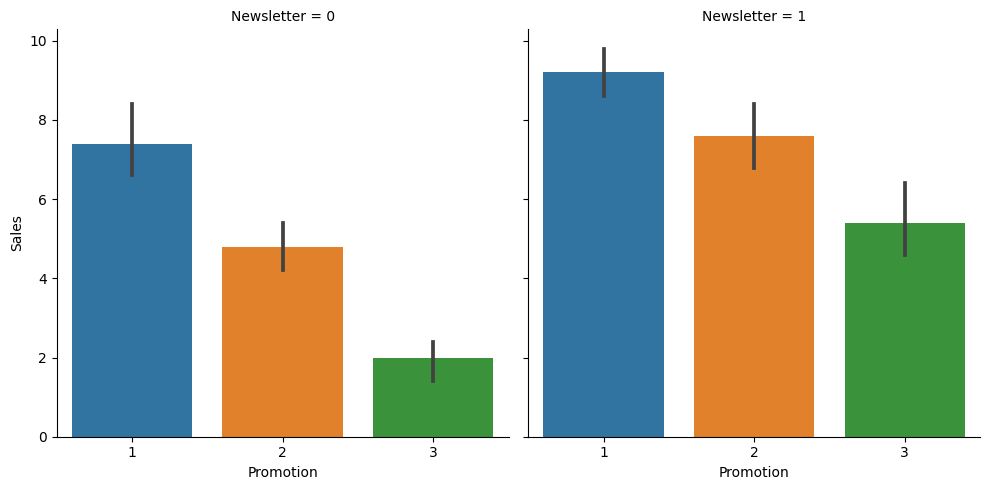

In [91]:
sns.catplot(y="Sales", x="Promotion", col="Newsletter", kind = "bar", data=sales)

It seems like level of promotion has an effect on sales. Moreover, it seems like including the product in a newsletter has an effect as well. 

In [98]:
model = smf.ols("Sales ~ C(Newsletter) + C(Promotion)", data = sales).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     52.20
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           3.86e-11
Time:                        07:40:49   Log-Likelihood:                -40.688
No. Observations:                  30   AIC:                             89.38
Df Residuals:                      26   BIC:                             94.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.9667      0.368     18.910      0.000       6.209       7.724
C(Newsletter)[T.1]     2.6667      0.368      7.238      0.000       1.909       3.424
C(Promotion)[T.2]     -2.1000      0.451     -4.654      0.000      -3.027      -1.173
C(Promotion)[T.3]     -4.6000      0.451    -10.195      0.000      -5.527      -3.673
==============================================================================
Omnibus:                        0.808   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.808
Skew:                           0.344   Prob(JB):                        0.668
Kurtosis:                       2.585   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
import statsmodels.api as sm
sm.stats.anova_lm(model, typ=3) 

,sum_sq,df,F,PR(>F)
Intercept,364.008333,1.0,357.590050,1.020414e-16
C(Newsletter),53.333333,1.0,52.392947,1.095036e-07
C(Promotion),106.066667,2.0,52.098237,8.032739e-10
Residual,26.466667,26.0,NaN,NaN


But what about interactions?

In [100]:
model = smf.ols("Sales ~ C(Newsletter) * C(Promotion)", data = sales).fit()
sm.stats.anova_lm(model, typ=3) 

,sum_sq,df,F,PR(>F)
Intercept,273.800000,1.0,283.241379,8.636680e-15
C(Newsletter),8.100000,1.0,8.379310,7.958602e-03
C(Promotion),72.933333,2.0,37.724138,3.902724e-08
C(Newsletter):C(Promotion),3.266667,2.0,1.689655,2.058092e-01
Residual,23.200000,24.0,NaN,NaN


## Power analysis

How do you know that you had 